# EXPLORATORY DATA ANALYSIS (EDA) OF DURNING CENTRE, EDGE HILL UNIVERSITY PHOTOVOLTAIC SYSTEM HISTORICAL GENERATION OUTPUT.


Importing the Data-Set for Analysis (Durning Centre Photovoltaic System, Edge Hill University)

In [1]:
import pandas as pd

# Specify the correct path to your CSV file
csv_file_path = r"C:\Users\Kamilk\Desktop\Durning centre data DailyReports-with env.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df.head())


         Date      Time  Total Yield[kWh]  ALLSKY_SFC_SW_DWN   T2M  \
0  01/01/2018  01:00:00               0.0                0.0  5.76   
1  01/01/2018  02:00:00               0.0                0.0  6.07   
2  01/01/2018  03:00:00               0.0                0.0  6.23   
3  01/01/2018  04:00:00               0.0                0.0  6.12   
4  01/01/2018  05:00:00               0.0                0.0  6.02   

   PRECTOTCORR  WS10M   WD10M  
0         0.29   9.20  239.93  
1         0.40   9.98  236.78  
2         0.28   9.99  237.25  
3         0.15   9.28  235.04  
4         0.10   8.72  232.90  


# Getting summary statistics for the entire dataset

Getting summary statistics for the entire dataset is a fundamental step. It involves calculating and reviewing various statistical measures that summarize the main features of a dataset, usually in a tabular form. This process provides a quick overview of the data, helping to understand its distribution, central tendency, variability, and other key characteristics. Here's what is typically included in summary statistics

In [6]:
# Getting summary statistics for the entire dataset
summary_statistics = df.describe()
summary_statistics



,Total Yield[kWh],ALLSKY_SFC_SW_DWN,T2M,PRECTOTCORR,WS10M,WD10M
count,49655.000000,49655.000000,49655.000000,49655.000000,49655.000000,49655.000000
mean,3.363539,123.840911,10.374498,0.114650,5.398862,204.112718
std,5.802658,187.987584,5.107538,0.288905,2.771081,87.229972
min,0.000000,0.000000,-4.150000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.440000,0.000000,3.360000,141.045000
50%,0.011000,9.860000,10.110000,0.020000,4.930000,216.890000
75%,4.296000,191.435000,14.300000,0.090000,7.040000,272.420000
max,34.657000,896.600000,29.200000,6.650000,21.470000,359.900000


The dataset contains 49655 rows of element and covers a time stamp from January 2018 to August 2023.

# Renaming the Columns to give clearer Meaning of terms

In [53]:
# Creating a new dataframe 'historical_data' with the same content as 'df'
historical_data = df.copy()

# Renaming the columns
historical_data.rename(columns={
    'ALLSKY_SFC_SW_DWN': 'All sky solar irradiance',
    'T2M': 'Temperature in degree',
    'PRECTOTCORR': 'Precipitation',
    'WS10M': 'Wind speed at 10 meters',
    'WD10M': 'Wind direction at 10 meters'
}, inplace=True)

# Displaying the first few rows of the new dataframe
historical_data.head()



,Total Yield[kWh],All sky solar irradiance,Temperature in degree,Precipitation,Wind speed at 10 meters,Wind direction at 10 meters,Year,Month,Season
DateTime,,,,,,,,,
2018-01-01 01:00:00,0.0,0.0,5.76,0.29,9.20,239.93,2018,1,Winter
2018-01-01 02:00:00,0.0,0.0,6.07,0.40,9.98,236.78,2018,1,Winter
2018-01-01 03:00:00,0.0,0.0,6.23,0.28,9.99,237.25,2018,1,Winter
2018-01-01 04:00:00,0.0,0.0,6.12,0.15,9.28,235.04,2018,1,Winter
2018-01-01 05:00:00,0.0,0.0,6.02,0.10,8.72,232.90,2018,1,Winter


# SIZE AND SPECIFICATION OF THE SYSTEM


The system is a 39.02kWp PV System with installation arrangement of a 33.84kWp roof top system consisting of 144 x 235W Yingli modules at 10 degrees pitch to roof and 5.18kWp facade system consisting of 28 x 185W Solarcentury modules mounted vertically.

Noteworthy, the PV relative weather parameters data gotten NASA Prediction of Worldwide Energy Resources for the Prediction Of Worldwide Energy Resources (POWER) https://power.larc.nasa.gov/data-access-viewer/ for Edge Hill University, Ormskirk on Latitude 53.558622, Longitude -2.875178 are:

    1. All sky solar irradiance  (kW/m2) 
        2. Temperature in degree
            3. precipitation in (mm)
                4. Wind speed at 10 meters in m/s
                    5. Wind direction at 10 meters in degree
The choice of the weather parameters selected thus far in this study is as advised by literatures on Photovoltaic System performance influncers.

Next is the:


1. Data Quality Check

A. Check for Missing Values
We will first check for any missing values in the dataset.

B. Identify Anomalies/Outliers
We will look for any anomalies or outliers in the dataset that could affect the analysis.

C. Validate Data Types
We'll ensure that each column has the appropriate data type, especially the date and time columns.

# Data Quality Check

In [11]:
# Data Quality Check

# A. Check for Missing Values
missing_values = df.isnull().sum()

# B. Identify Anomalies/Outliers
# For a basic check, we'll look at the statistical summary again, focusing on extreme values.
potential_outliers = df.describe()

# C. Validate Data Types
data_types = df.dtypes

missing_values, potential_outliers, data_types


(Date                 0
 Time                 0
 Total Yield[kWh]     0
 ALLSKY_SFC_SW_DWN    0
 T2M                  0
 PRECTOTCORR          0
 WS10M                0
 WD10M                0
 dtype: int64,
        Total Yield[kWh]  ALLSKY_SFC_SW_DWN           T2M   PRECTOTCORR  \
 count      49655.000000       49655.000000  49655.000000  49655.000000   
 mean           3.363539         123.840911     10.374498      0.114650   
 std            5.802658         187.987584      5.107538      0.288905   
 min            0.000000           0.000000     -4.150000      0.000000   
 25%            0.000000           0.000000      6.440000      0.000000   
 50%            0.011000           9.860000     10.110000      0.020000   
 75%            4.296000         191.435000     14.300000      0.090000   
 max           34.657000         896.600000     29.200000      6.650000   
 
               WS10M         WD10M  
 count  49655.000000  49655.000000  
 mean       5.398862    204.112718  
 std 

A. Missing Value Point

There are no missing values in the dataset. Each column is fully populated. 

It is worth mentioning that prior data analysis was conducted on microsoft excel to eliminate few cases of missing data point as a result of:

1. Network Glitch during the upload of the data set to the monitoring portal.
2. Network or Site Specific Glitches during the download of the weather datas.

The few cases of missing data were handled by replacing the missing data point with a similar values for the previous year to avoid biased analysis. 


B. Anomalies/Outliers

Based on the summary statistics, there don't appear to be significant anomalies or outliers. The maximum and minimum values for each feature seem within reasonable ranges, but a deeper analysis (such as visualizing with box plots) might be needed for a conclusive assessment. 

C. Data Types

Date and Time are currently of the object type. These should ideally be converted to a datetime format for easier manipulation and analysis.
Other columns like Total Yield[kWh], ALLSKY_SFC_SW_DWN, T2M, PRECTOTCORR, WS10M, and WD10M are of type float64, which is appropriate for numerical data.

In [12]:
import pandas as pd

# Convert 'Date' and 'Time' into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Set this new column as the index of the dataframe
df.set_index('DateTime', inplace=True)

# Drop the original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Display the first few rows of the updated dataframe
df.head()


,Total Yield[kWh],ALLSKY_SFC_SW_DWN,T2M,PRECTOTCORR,WS10M,WD10M
DateTime,,,,,,
2018-01-01 01:00:00,0.0,0.0,5.76,0.29,9.20,239.93
2018-01-01 02:00:00,0.0,0.0,6.07,0.40,9.98,236.78
2018-01-01 03:00:00,0.0,0.0,6.23,0.28,9.99,237.25
2018-01-01 04:00:00,0.0,0.0,6.12,0.15,9.28,235.04
2018-01-01 05:00:00,0.0,0.0,6.02,0.10,8.72,232.90


The Date and Time columns have been successfully merged into a single datetime column named 'DateTime', which is now set as the index of the dataframe. This format is more suitable for time series analysis

# Continuing with Time Series Specific Analysis of the PV System
PLOTTING THE TOTAL OUTPUT GENERATION OF THE DURNING CENTRE PV SYSTEM [kWh]



When plotting the 'Total Yield[kWh]' time series, you are visually representing the data points of your 'Total Yield[kWh]' variable over a specified time period. This graphical representation is crucial in time series analysis as it provides insights into various aspects of the data, including trends, patterns, seasonality, and anomalies. Here's what happens and what to look for in such a plot:

    Time on X-Axis: The X-axis typically represents time. Each data point on the plot corresponds to a specific time interval (e.g. annually as represented).

    Total Yield on Y-Axis: The Y-axis represents the values of 'Total Yield[kWh]'. These values could represent energy yield, production.

    Data Points: Each point on the plot represents the value of 'Total Yield[kWh]' at a specific time. These points are plotted chronologically.

    Line Connecting Points: In a line plot, the data points are usually connected in the order they occur. This line helps in identifying patterns, trends, and fluctuations in the data over time.

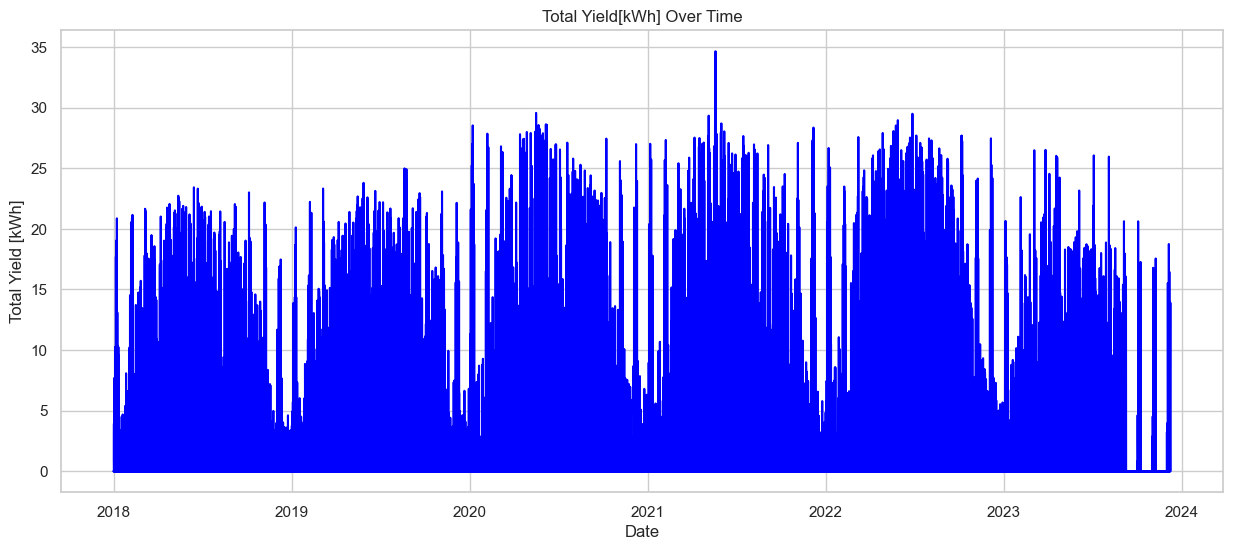

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the 'Total Yield[kWh]' time series
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Total Yield[kWh]'], color='blue')
plt.title('Total Yield[kWh] Over Time')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


# Regression plot for the time series of 'Total Yield[kWh]
To analyze the relationship between 'Total Yield[kWh]' and the other features based on the regression plots, we typically look for the direction and shape of the regression line.

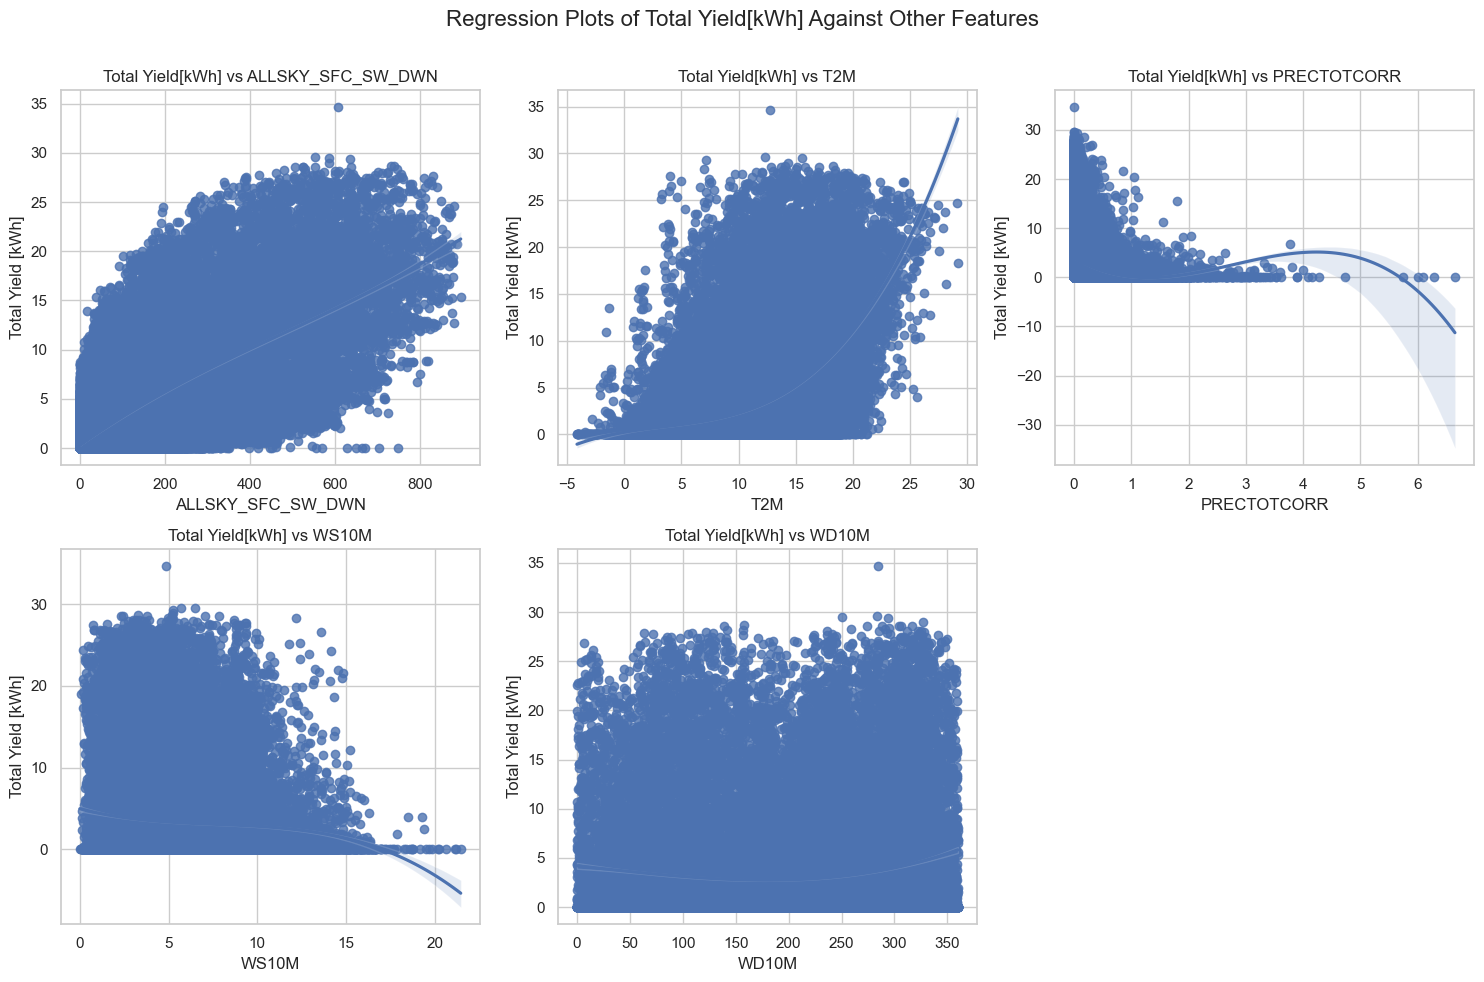

In [19]:
# regression plot for the time series of 'Total Yield[kWh]'

# Trying a different approach to plot the time series
# Creating regression plots of 'Total Yield[kWh]' against all other features

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe
# Replace 'df' with the name of your dataframe variable

# Selecting the features for regression plots
features = df.columns.drop('Total Yield[kWh]')

# Determine the number of rows and columns for the subplots
num_features = len(features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Round up division

# Setting up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
fig.suptitle('Regression Plots of Total Yield[kWh] Against Other Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterating over the features to create regression plots
for i, feature in enumerate(features):
    sns.regplot(x=df[feature], y=df['Total Yield[kWh]'], ax=axes[i], order=3)
    axes[i].set_title(f'Total Yield[kWh] vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total Yield [kWh]')

# Remove any extra subplots
for j in range(i + 1, num_cols * num_rows):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust this as needed for the title
plt.show()



From the Regression Plot We look for:
    
   Directly Proportional (Positive Relationship): If the regression line slopes upwards as the feature increases, it indicates a positive relationship. This means as the feature value increases, the 'Total Yield[kWh]' also increases.

    Inversely Proportional (Negative Relationship): If the regression line slopes downwards, it indicates a negative relationship. This means as the feature value increases, the 'Total Yield[kWh]' decreases.

    Partially Proportional: If the regression line is more complex (e.g., a cubic shape), the relationship may change at different values of the feature. This can indicate a partially proportional relationship where 'Total Yield[kWh]' may increase with the feature up to a certain point and then decrease, or vice versa.

    No Clear Relationship: If the data points are very scattered and do not show any clear trend with the regression line, it might indicate that there is no clear relationship, or that other factors are influencing the relationship.

# The correlation matrix
The correlation matrix is to quantitatively analyze the relationships between 'Total Yield[kWh]' and other features. The correlation matrix provides a numeric representation of the relationships, where values close to +1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate no linear correlation

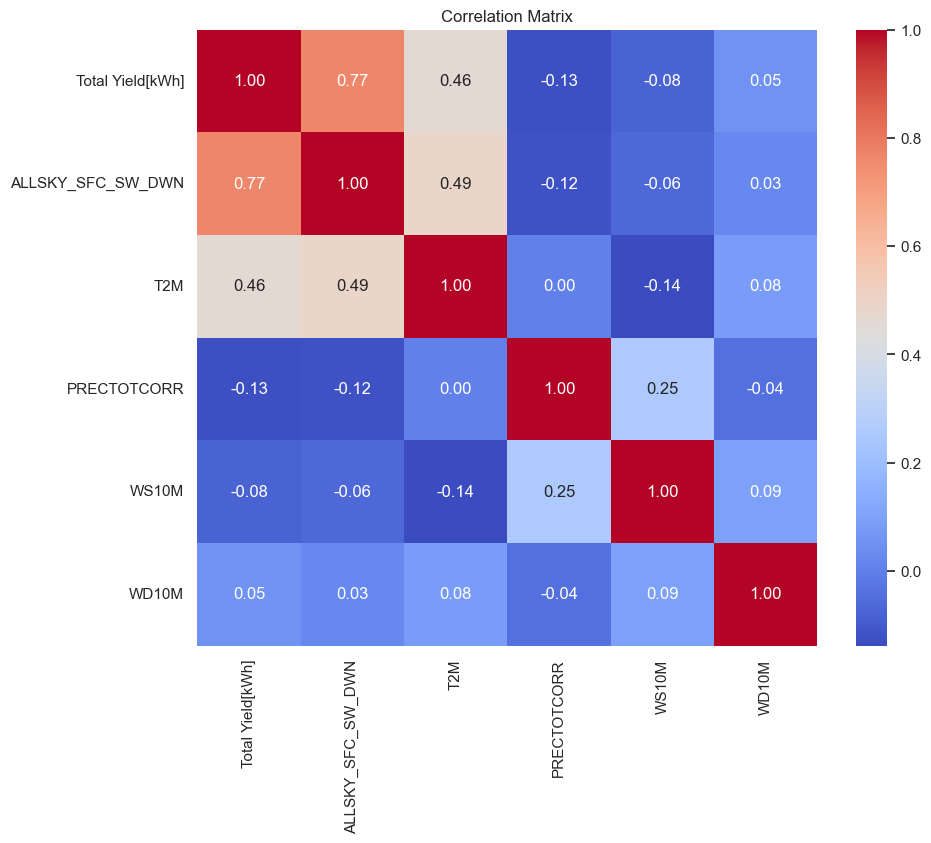

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Let's interpret each of these coefficients as the relates to the total yeild of the PV System:

    Correlation Coefficient = 1: This is the correlation of 'Total Yield[kWh]' with itself, which is always 1.

    Correlation Coefficient = 0.77: This indicates a strong positive linear relationship. A feature with this correlation increases, 'Total Yield[kWh]' tends to increase as well. This is a significant correlation, suggesting that the feature is a good predictor of 'Total Yield[kWh]'.

    Correlation Coefficient = 0.46: This represents a moderate positive linear relationship. As this feature increases, 'Total Yield[kWh]' tends to increase, but not as strongly as the feature with a 0.77 correlation.

    Correlation Coefficient = -0.13: This is a weak negative linear relationship. As this feature increases, 'Total Yield[kWh]' tends to decrease slightly. However, the correlation is weak, implying that the feature is not a strong predictor of 'Total Yield[kWh]'.

    Correlation Coefficient = -0.08: This also indicates a weak negative linear relationship, even weaker than the -0.13 correlation. The influence of this feature on 'Total Yield[kWh]' is minimal.

    Correlation Coefficient = 0.05: This suggests a very weak positive linear relationship, almost negligible. This feature does not significantly affect 'Total Yield[kWh]'.

# Annual Generation Output of the PV System

 Bar plot and a line plot, both showing the total annual generation output for each year. The bar plot provides a clear comparison between years, while the line plot may help in identifying trends over time.

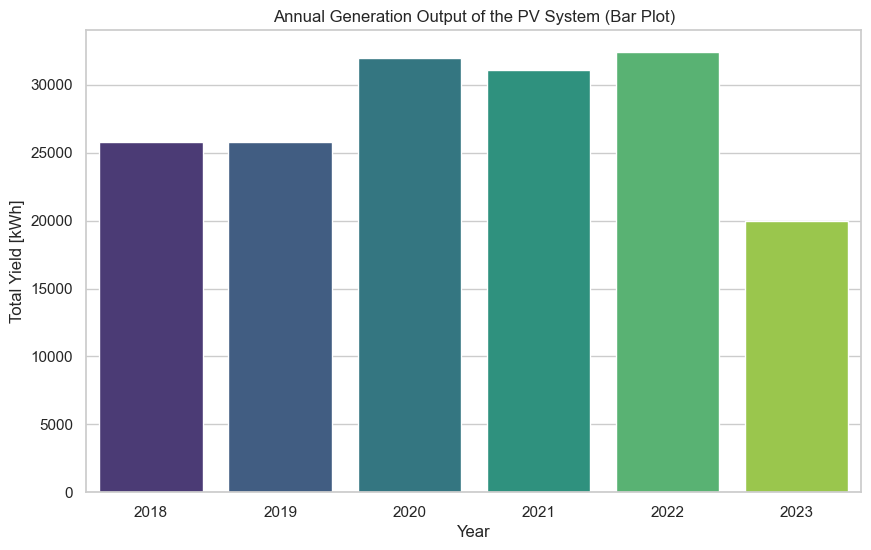

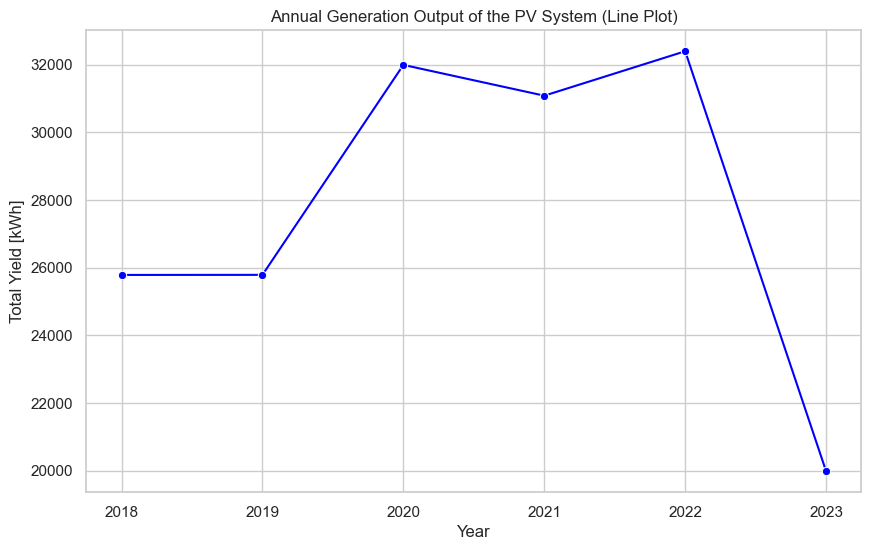

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Extracting the year from the datetime index
df['Year'] = df.index.year

# Grouping by year and summing up the total yield
annual_yield = df.groupby('Year')['Total Yield[kWh]'].sum()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_yield.index, y=annual_yield.values, palette="viridis")
plt.title('Annual Generation Output of the PV System (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_yield.index, y=annual_yield.values, marker='o', color='blue')
plt.title('Annual Generation Output of the PV System (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()


 
Noteworthy, there was dip in 2023 because the data coverage stopped at September, 2023.
 

# Pro-Rata Analysis for 2023 with Bar Plot Visualisation of Result

"Annual Generation Output with Pro-Rata for 2023 (Highlighted)" refers to a specific way of presenting and interpreting the data in your plots, taking into account the adjustments made for partial data in 2023. Let me break down this phrase for clarity:

Annual Generation Output: This refers to the total energy production or yield (in this case, 'Total Yield[kWh]') of the PV system for each year.

With Pro-Rata for 2023: Since the data for 2023 is incomplete (covering only part of the year), a pro-rata calculation is applied. This means the data for 2023 is scaled up to estimate what the full year's data would look like, assuming the rate of generation remains consistent throughout the year. This adjustment provides a more accurate comparison with other years where full-year data is available.


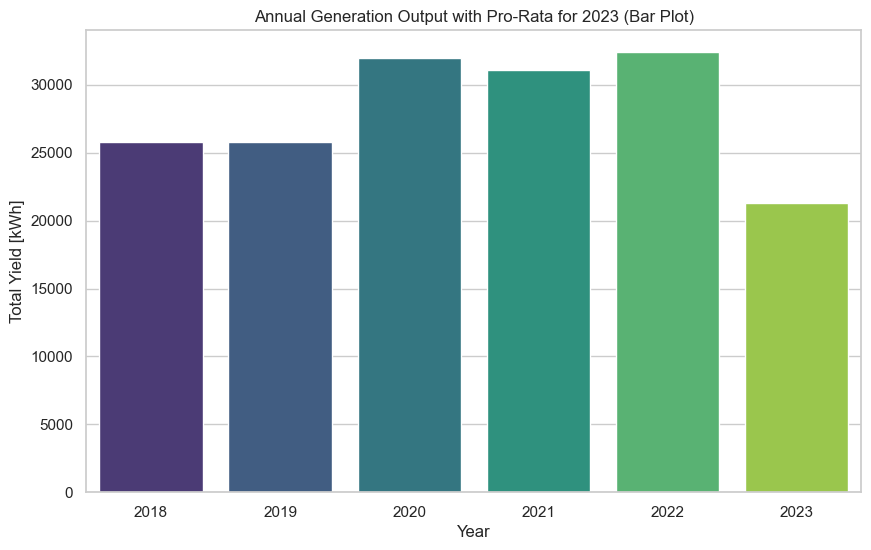

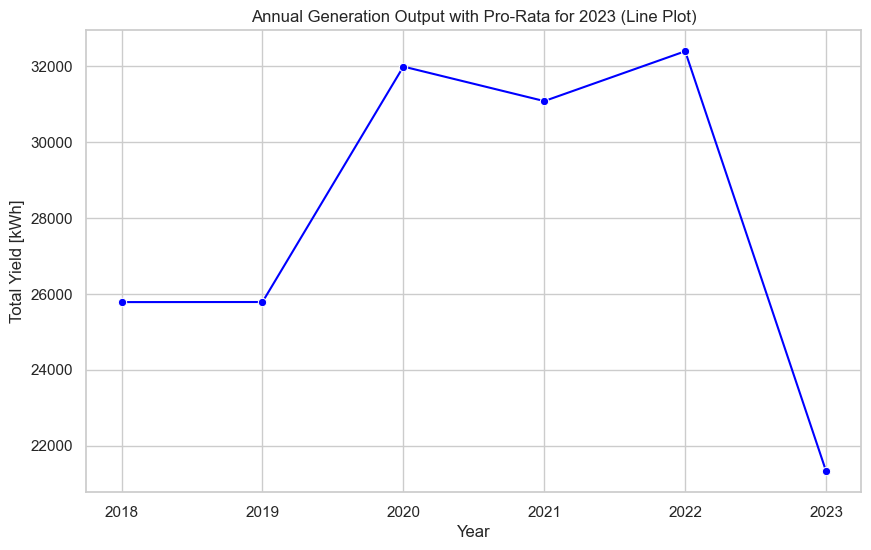

In [59]:
# Pro-Rata Analysis for 2023

# Current total yield for 2023
yield_2023_current = annual_yield.get(2023, 0)

# Number of days covered in 2023 in the dataset
days_covered_2023 = df[df.index.year == 2023].index.dayofyear.max()

# Assuming a normal year has 365 days (ignoring leap years for simplicity)
total_days = 365

# Calculating the pro-rata annual yield for 2023
yield_2023_prorata = (yield_2023_current / days_covered_2023) * total_days

# Updating the annual yield data with the pro-rata value for 2023
annual_yield_prorata = annual_yield.copy()
annual_yield_prorata[2023] = yield_2023_prorata

# Creating the updated bar plot with the pro-rata value for 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, palette="viridis")
plt.title('Annual Generation Output with Pro-Rata for 2023 (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()

# Creating the updated line plot with the pro-rata value for 2023
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, marker='o', color='blue')
plt.title('Annual Generation Output with Pro-Rata for 2023 (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()


Highlighted: In the visualizations (bar plot and line plot), the data for 2023 is specifically emphasized or marked differently (e.g., with a different color or annotation). This is done to clearly indicate to viewers that the data for this year has been adjusted and is different from the straightforward calculations done for other years.
So, the phrase as a whole refers to the presentation of annual energy generation data where the 2023 data has been adjusted to account for partial coverage and is visually distinguished in the plots to make this adjustment clear. This approach provides a more accurate and context-aware interpretation of the data, particularly for comparison across different years.

# Monthly  Generation of the PV System Comparison  (2018 - 2023)

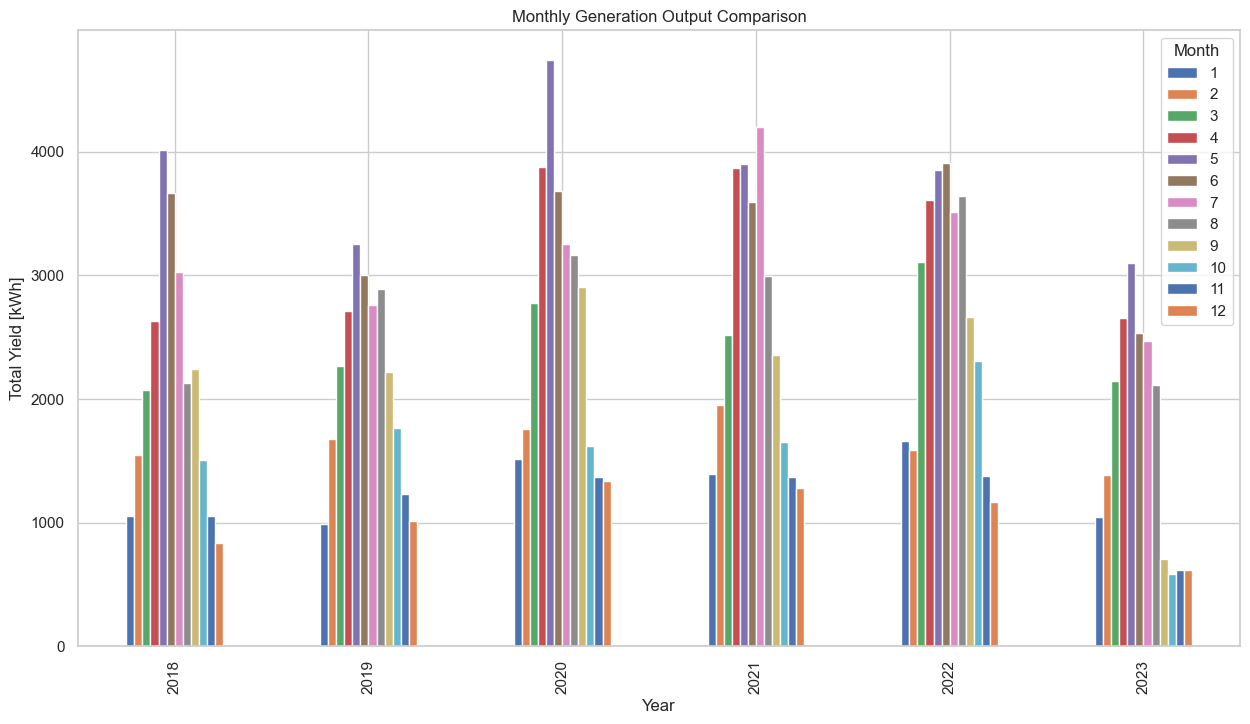

In [24]:
# Monthly or Quarterly Comparison
df['Month'] = df.index.month
monthly_yield = df.groupby(['Year', 'Month'])['Total Yield[kWh]'].sum().unstack()
# For quarterly data, replace 'Month' with 'Quarter' and calculate the quarter using df.index.quarter

# Plotting monthly data
monthly_yield.plot(kind='bar', figsize=(15, 8), title='Monthly Generation Output Comparison')
plt.ylabel('Total Yield [kWh]')
plt.show()


Noticeably, the average generation output for all the summer months when PV performance is at peak are lower 2023 as compared to the same months in the previous years.

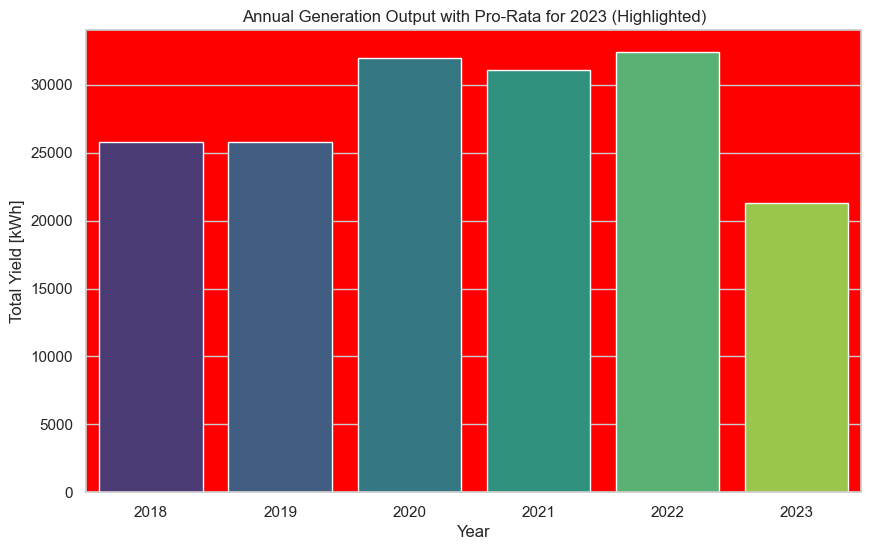

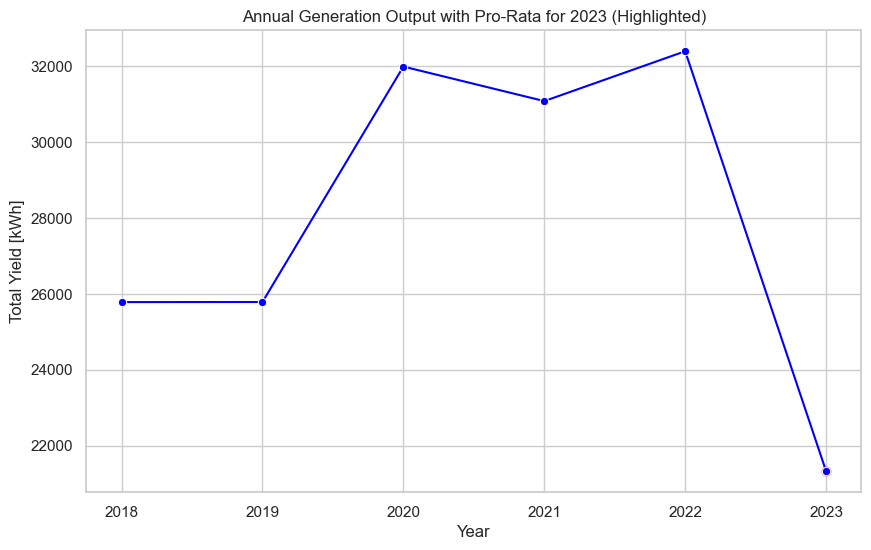

In [25]:
# Creating the bar plot with highlighted data for 2023
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, palette="viridis")
# Highlighting 2023
barplot.get_children()[-1].set_color('red')
plt.title('Annual Generation Output with Pro-Rata for 2023 (Highlighted)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()

# Creating the line plot with highlighted data for 2023
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(x=annual_yield_prorata.index, y=annual_yield_prorata.values, marker='o', color='blue')
# Highlighting 2023
plt.scatter(2023, annual_yield_prorata[2023], color='red')
plt.title('Annual Generation Output with Pro-Rata for 2023 (Highlighted)')
plt.xlabel('Year')
plt.ylabel('Total Yield [kWh]')
plt.show()


# Average Monthly Total Yield [kWh] Across Different Years
This line plot will display the average monthly 'Total Yield [kWh]' across different years, allowing you to observe seasonal trends and compare performance across years. 

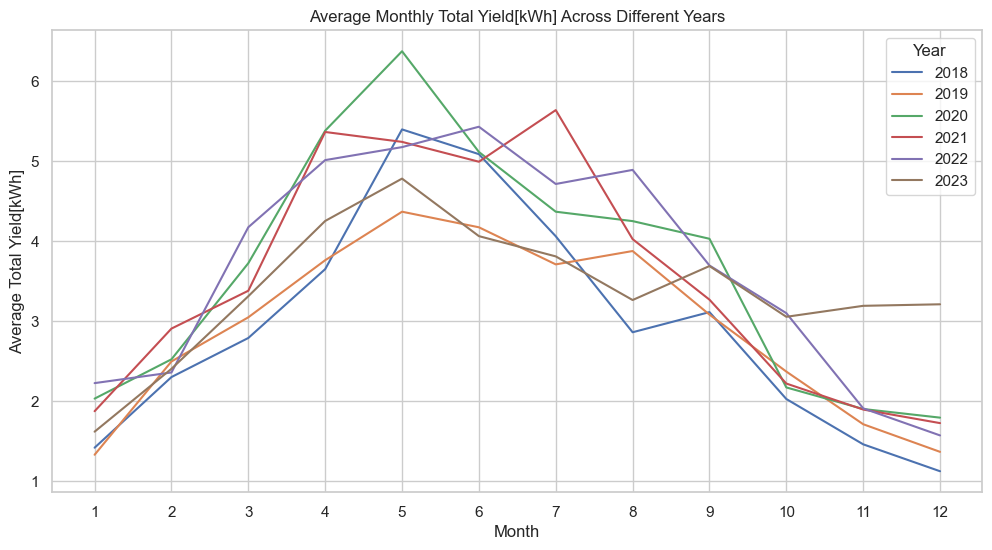

In [26]:
# Step 1: Extracting year and month from the DateTime index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Step 2: Grouping data by year and month to calculate average total yield
monthly_yield_avg = df.groupby(['Year', 'Month'])['Total Yield[kWh]'].mean().reset_index()

# Step 3: Creating a line plot to observe seasonal trends
plt.figure(figsize=(12, 6))

# Plotting each year's data
for year in monthly_yield_avg['Year'].unique():
    monthly_data = monthly_yield_avg[monthly_yield_avg['Year'] == year]
    plt.plot(monthly_data['Month'], monthly_data['Total Yield[kWh]'], label=year)

plt.title('Average Monthly Total Yield[kWh] Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Total Yield[kWh]')
plt.xticks(range(1, 13))  # Months from 1 to 12
plt.legend(title='Year')
plt.grid(True)
plt.show()



Noticeably, 2021 had the peak which occured in month 5 (May) and the peak month is relative to all other years.

# Comparative Seasonal Yield of the PV System using Line and Bar Plot

"Comparative Seasonal Yield" refers to an analysis where the average energy production or yield of a photovoltaic (PV) system is compared across different seasons (such as Spring, Summer, Autumn, Winter) and possibly across different years. This type of analysis is valuable for understanding how the yield of a PV system varies with seasonal changes, which can be influenced by factors such as solar irradiance, temperature, and weather patterns.


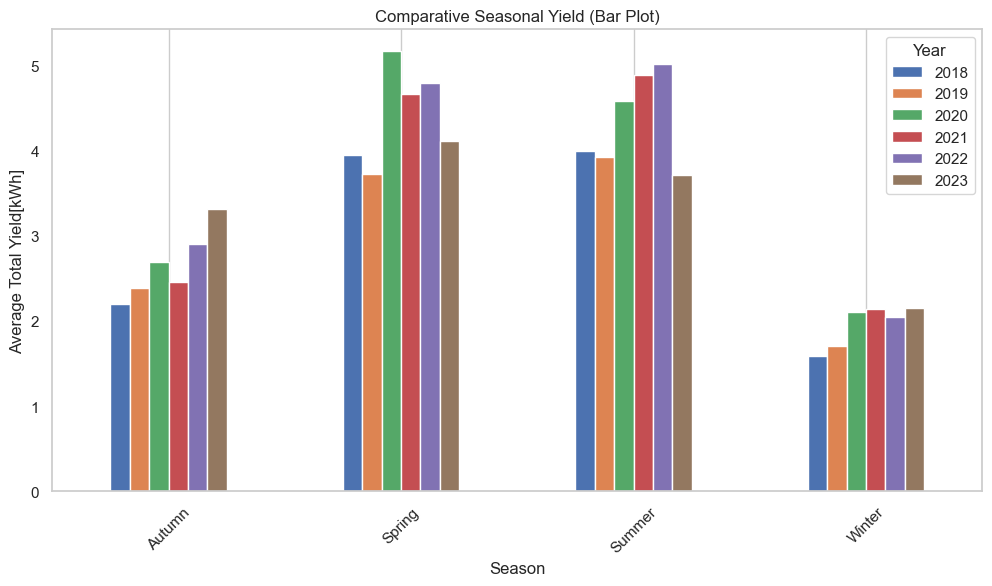

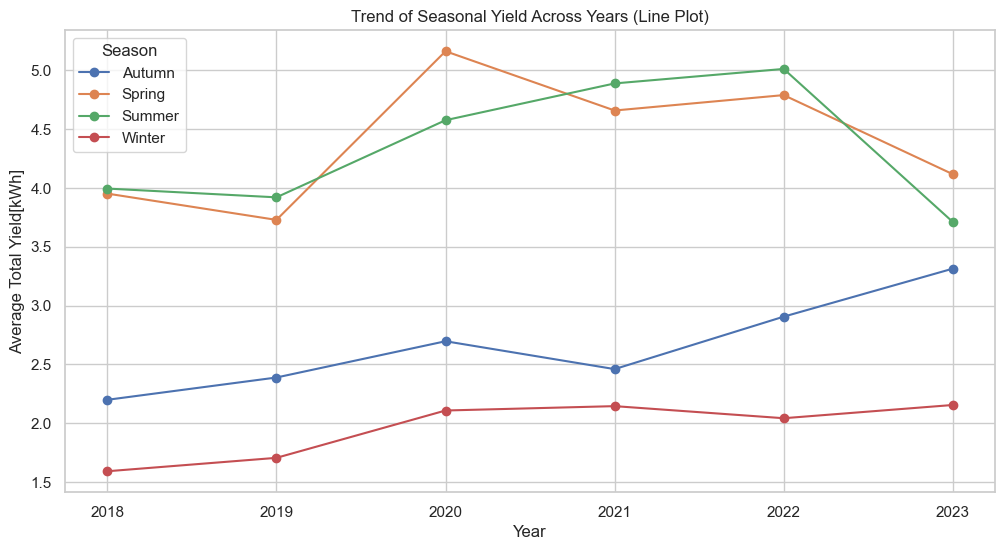

In [29]:
import matplotlib.pyplot as plt

# Assuming your dataset is in a DataFrame named 'df'
# The DataFrame should have a 'Total Yield[kWh]' column and a datetime index

# Creating the 'Season' Column
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to the 'Month' column to create the 'Season' column
df['Season'] = df['Month'].apply(month_to_season)

# Preparing data for bar plot and line plot
seasonal_trends = df.groupby(['Season', 'Year'])['Total Yield[kWh]'].mean().unstack()

# Bar Plot for comparing seasonal yield across years
seasonal_trends.plot(kind='bar', figsize=(12, 6))
plt.title('Comparative Seasonal Yield (Bar Plot)')
plt.ylabel('Average Total Yield[kWh]')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y')
plt.show()

# Line Plot for visualizing trend across individual seasons
seasonal_trends.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trend of Seasonal Yield Across Years (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Average Total Yield[kWh]')
plt.legend(title='Season')
plt.grid(True)
plt.show()



Here’s how it affects and is relevant to the total yield of a PV system:

    Solar Irradiance Variations: Solar irradiance can vary significantly across seasons. Typically, summer has higher irradiance due to longer daylight hours and a higher position of the sun, leading to higher energy production. Winter, on the other hand, often sees reduced irradiance.

    Temperature Effects: PV panels can be affected by temperature. Extreme temperatures, both hot and cold, can affect the efficiency of solar panels. In some cases, cooler temperatures in spring or autumn might be more favorable for PV efficiency than the hot summer temperatures.

    Weather Patterns: Different seasons might have varying weather patterns like cloud cover, rain, or snow, which can impact solar energy production. For instance, a season with more cloudy days can result in lower yield.

    Planning and Forecasting: Understanding seasonal trends in solar energy production is crucial for energy planning and forecasting. It helps in predicting energy output, planning for energy storage or backup needs, and optimizing the use of the energy produced.

    System Design and Efficiency: Comparative seasonal yield analysis can inform decisions about system design, such as the angle of solar panels, which can be optimized based on seasonal sun positions to maximize energy capture throughout the year.

In my specific context, analyzing the 'Comparative Seasonal Yield' means examining how the average total yield of your PV system varies in different seasons and potentially across different years. This analysis will highlight the times of the year when the system is most productive and when it is less productive, providing insights that could guide the management and optimization of the system.

# Augmented Dickey-Fuller test

The Augmented Dickey-Fuller (ADF) test is conducted primarily to test for stationarity in a time series. A time series is considered stationary if its statistical properties such as mean, variance, and autocorrelation are constant over time. In other words, a stationary time series does not exhibit trends or seasonal patterns and has consistent fluctuations around a constant mean.

In [30]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test on 'Total Yield[kWh]'
adf_test_result = adfuller(df['Total Yield[kWh]'])

# Extracting the test results
adf_statistic = adf_test_result[0]
p_value = adf_test_result[1]
critical_values = adf_test_result[4]

adf_statistic, p_value, critical_values



(-11.615160829122424,
 2.4589727795907197e-21,
 {'1%': -3.430481836917031,
  '5%': -2.861598269199506,
  '10%': -2.5668010147695446})

Interpreting the Results

    ADF Statistic: This is the test statistic. More negative values indicate stronger evidence against the null hypothesis (that the series is non-stationary).

    p-value: If the p-value is low (commonly below 0.05), it suggests that the series is stationary.

    Critical Values: These values are used to compare with the ADF statistic at different confidence levels (e.g., 1%, 5%, 10%). If the ADF statistic is less than the critical value, the null hypothesis can be rejected at that confidence level.

The results of the Augmented Dickey-Fuller (ADF) test for my 'Total Yield[kWh]' time series are as follows:

    ADF Statistic: -11.615160829122424
    p-value: 2.4589727795907197e-21
    Critical Values:
        For 1%: -3.430481836917031
        For 5%: -2.861598269199506
        For 10%: -2.5668010147695446

Interpretation:

    ADF Statistic: The ADF statistic is -11.615, which is much lower (more negative) than any of the critical values. A more negative ADF statistic provides stronger evidence against the null hypothesis.

    p-value: The p-value is approximately 2.46e-21, which is extremely low (practically 0). A low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis.

    Critical Values: These values correspond to the thresholds for the ADF statistic at different confidence levels. The fact that the ADF statistic is lower than all these critical values suggests that the null hypothesis can be rejected at the 1%, 5%, and 10% levels.

Conclusion:

Given the ADF statistic and the extremely low p-value, you can reject the null hypothesis of non-stationarity with a high degree of confidence. This means the 'Total Yield[kWh]' time series is stationary. In other words, its statistical properties like mean and variance are consistent over time, making it suitable for many types of time series forecasting models that assume stationarity.

# Investigating Cyclic Behavior

Investigating Cyclic Behavior

    Visual Inspection: Looking for patterns that appear at irregular intervals in the time series plot.

    Spectral Analysis: Using methods like the Fourier Transform to identify periodicity in the data.

    Autocorrelation and Partial Autocorrelation Plots: These plots can help identify if there is any autocorrelation in the data, which might suggest cyclic behavior.

# Autocorrelation and Partial Autocorrelation Plots.

Autocorrelation and Partial Autocorrelation are important concepts in time series analysis, particularly in understanding the relationship of a series with its past values. Let's explore each of these and their applicability in your case of analyzing 'Total Yield[kWh]' in a PV system. 

Autocorrelation (ACF)

Definition: Autocorrelation, also known as serial correlation or lagged correlation, measures the correlation of a time series with its own past values. It quantifies the degree to which current values in the series are influenced by its past values.

Usage: An autocorrelation plot (ACF plot) displays the autocorrelation of the series with lags of itself. For instance, at lag 1, it correlates values with their immediate previous value, at lag 2 with values two time periods before, and so on.

Interpretation in Time Series Analysis:
    Significant peaks in the ACF plot indicate that the series is influenced by its past values at those lags.
    A slowly decaying ACF plot suggests a long-memory process or a trend in the data.
    A sharp drop after a few lags can indicate seasonality.
Partial Autocorrelation (PACF)

Definition: Partial autocorrelation measures the correlation of a series with its past values while controlling for the values at all shorter lags. It isolates the correlation at each lag, removing the effect of previous lags.

Usage: The PACF plot shows the partial autocorrelation for each lag.

Interpretation in Time Series Analysis:
    Significant spikes in the PACF plot indicate the number of lags that have a direct relationship with the current value of the series.
    PACF is particularly useful in identifying the order of autoregressive (AR) terms in ARIMA modeling.

<Figure size 1200x600 with 0 Axes>

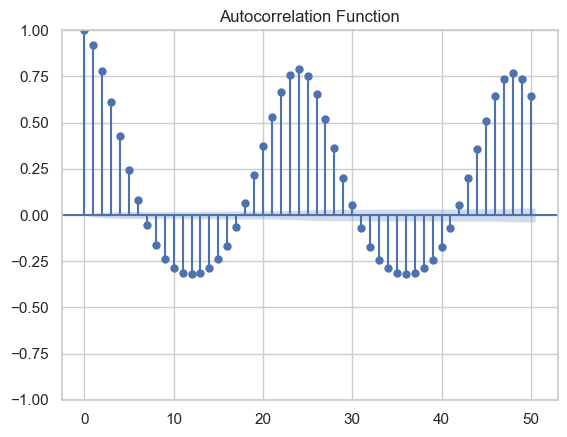

<Figure size 1200x600 with 0 Axes>

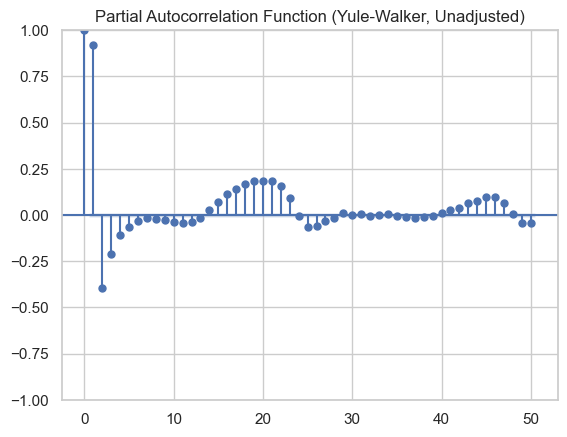

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Total Yield[kWh]'], lags=50)
plt.title('Autocorrelation Function')

plt.figure(figsize=(12, 6))
plot_pacf(df['Total Yield[kWh]'], lags=50, method='ywm')  # Specifying the method
plt.title('Partial Autocorrelation Function (Yule-Walker, Unadjusted)')

plt.show()



Applicability in my Analysis

In the context of analyzing 'Total Yield[kWh]' of a PV system:

    Identifying Dependence on Past Values: The ACF and PACF plots can help you understand how current energy yields are influenced by past performance. For instance, a strong autocorrelation at certain lags could suggest a pattern or rhythm in the energy production.

    Model Selection for Forecasting: If you plan to use models like ARIMA for forecasting future yields, the PACF plot can help determine the appropriate number of AR terms to include in the model.

    Detecting Seasonality and Trends: Significant autocorrelations at specific lags might indicate seasonality, which is crucial for a PV system as energy yield can be season-dependent.

In summary, ACF and PACF analyses can provide deep insights into the temporal structure of your time series data, helping in both understanding past behavior and forecasting future performance.

# Rolling mean

The rolling mean (also known as the moving average) is a widely-used technique for smoothing time series data to identify trends. It involves calculating the average of the data points within a specified window that 'rolls' or moves across the data. Here's how it helps in identifying trends:

    Smoothing Short-Term Fluctuations: By averaging the data over a window, the rolling mean smooths out short-term ups and downs. This makes it easier to see long-term movements or trends in the data.

    Indicating Trend Direction:
        If the rolling mean is consistently increasing over a period, it indicates an upward trend. The data, on average, is increasing over that period.
      

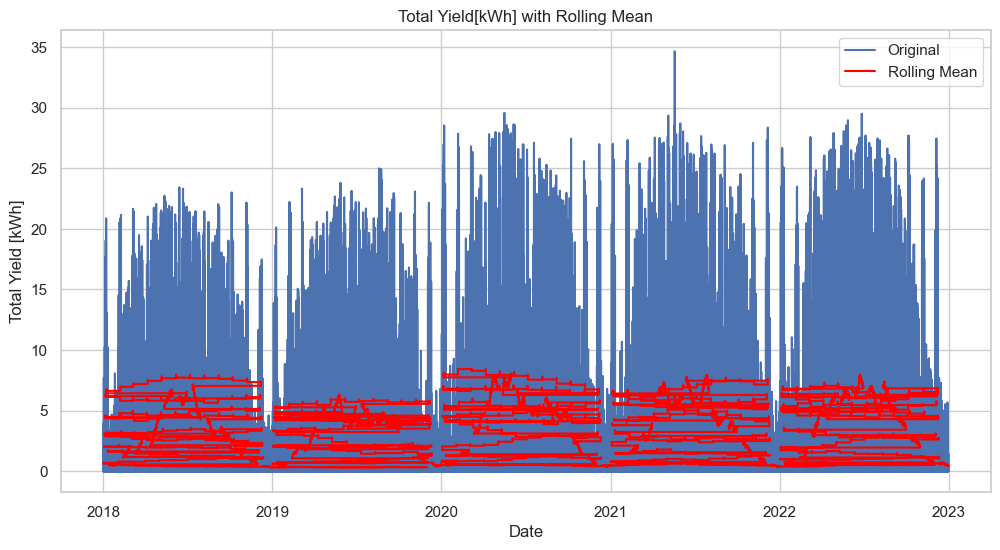

In [78]:
import matplotlib.pyplot as plt

rolling_window = 365  # 1 year
df_roll_mean = df['Total Yield[kWh]'].rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Total Yield[kWh]'], label='Original')
plt.plot(df_roll_mean, color='red', label='Rolling Mean')
plt.title('Total Yield[kWh] with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.legend()
plt.show()


In my case, examining the rolling mean of 'Total Yield[kWh]' helps in determining whether there's a general upward or downward trend in the energy yield of the PV system over time. This insight can be instrumental in assessing the performance and planning for future adjustments or investments in the system.

# Year-over-Year Change [kWh] in generation output of the PV System

In [36]:
# Step 1: Aggregate the Total Yield by Year
yearly_yield = df.resample('Y')['Total Yield[kWh]'].sum()

# Step 2: Calculate the Year-over-Year Absolute Change
yearly_yield_diff = yearly_yield.diff()

# Step 3: Calculate the Year-over-Year Percentage Change
yearly_yield_pct_change = yearly_yield.pct_change() * 100

# Creating a new DataFrame to display the results
yearly_change_df = pd.DataFrame({
    'Total Yield[kWh]': yearly_yield,
    'Year-over-Year Change [kWh]': yearly_yield_diff,
    'Percentage Change [%]': yearly_yield_pct_change
})

yearly_change_df



,Total Yield[kWh],Year-over-Year Change [kWh],Percentage Change [%]
DateTime,,,
2018-12-31,25783.731,NaN,NaN
2019-12-31,25786.124,2.393,0.009281
2020-12-31,31990.043,6203.919,24.059137
2021-12-31,31080.398,-909.645,-2.843525
2022-12-31,32393.518,1313.120,4.224914
2023-12-31,19982.703,-12410.815,-38.312649


The Year over Year analysis provides insights into the annual performance of your PV system, highlighting any significant increases or decreases in yield over the years. It can be particularly useful for identifying trends and evaluating the impact of any changes or interventions made in the system. From the result we can see that in 2019, 2020 and 2022 year end, there was an increase in the generation output as compared to the big dip in generation that occurred in 2023. 

# Year-over-Year Absolute Change and Percentage Change in Total Yield [kWh]

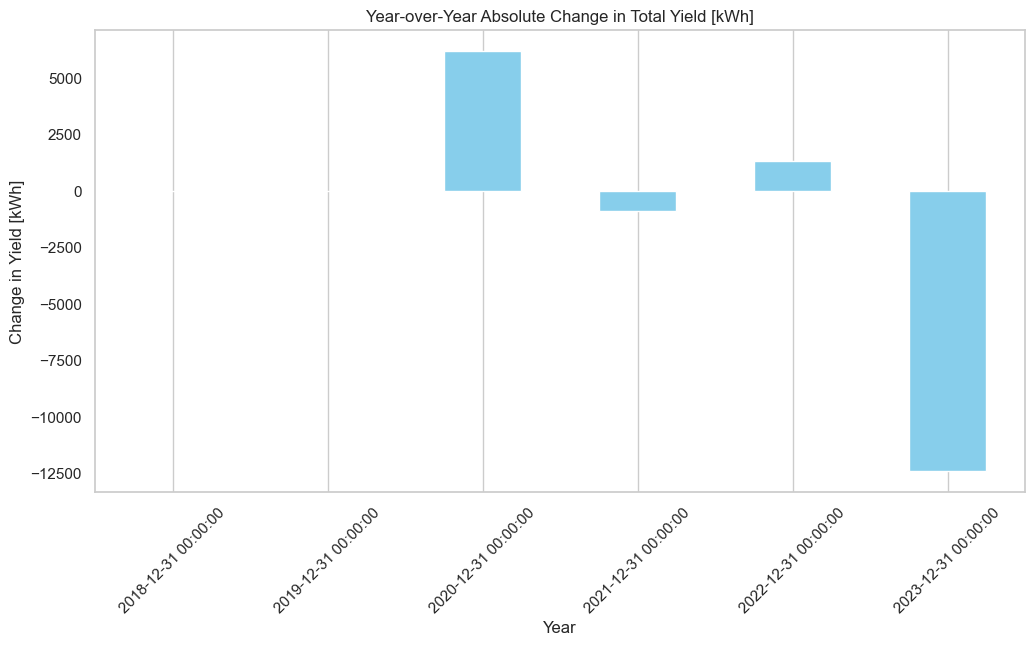

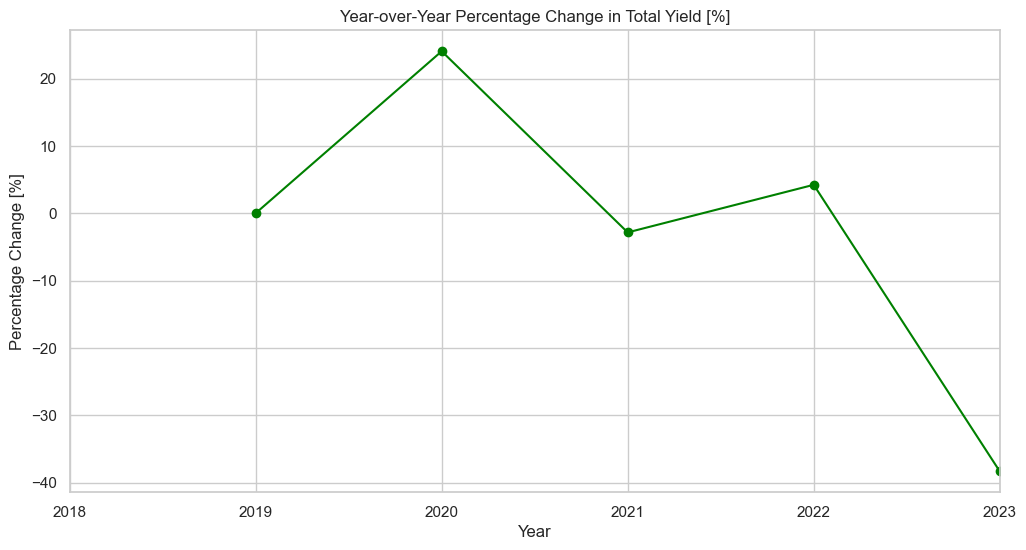

In [38]:
import matplotlib.pyplot as plt

# Assuming 'yearly_change_df' is the DataFrame with your year-over-year data

# Bar Plot for Year-over-Year Absolute Change
plt.figure(figsize=(12, 6))
yearly_change_df['Year-over-Year Change [kWh]'].plot(kind='bar', color='skyblue')
plt.title('Year-over-Year Absolute Change in Total Yield [kWh]')
plt.xlabel('Year')
plt.ylabel('Change in Yield [kWh]')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Line Plot for Year-over-Year Percentage Change
plt.figure(figsize=(12, 6))
yearly_change_df['Percentage Change [%]'].plot(kind='line', marker='o', color='green')
plt.title('Year-over-Year Percentage Change in Total Yield [%]')
plt.xlabel('Year')
plt.ylabel('Percentage Change [%]')
plt.grid(True)
plt.show()




These visualizations will allow you to quickly identify years with significant changes in yield, either increases or decreases, and may help in pinpointing any external factors or system changes that might have influenced these variations.

# Plotting Quarterly Generation of the PV system for Comparison



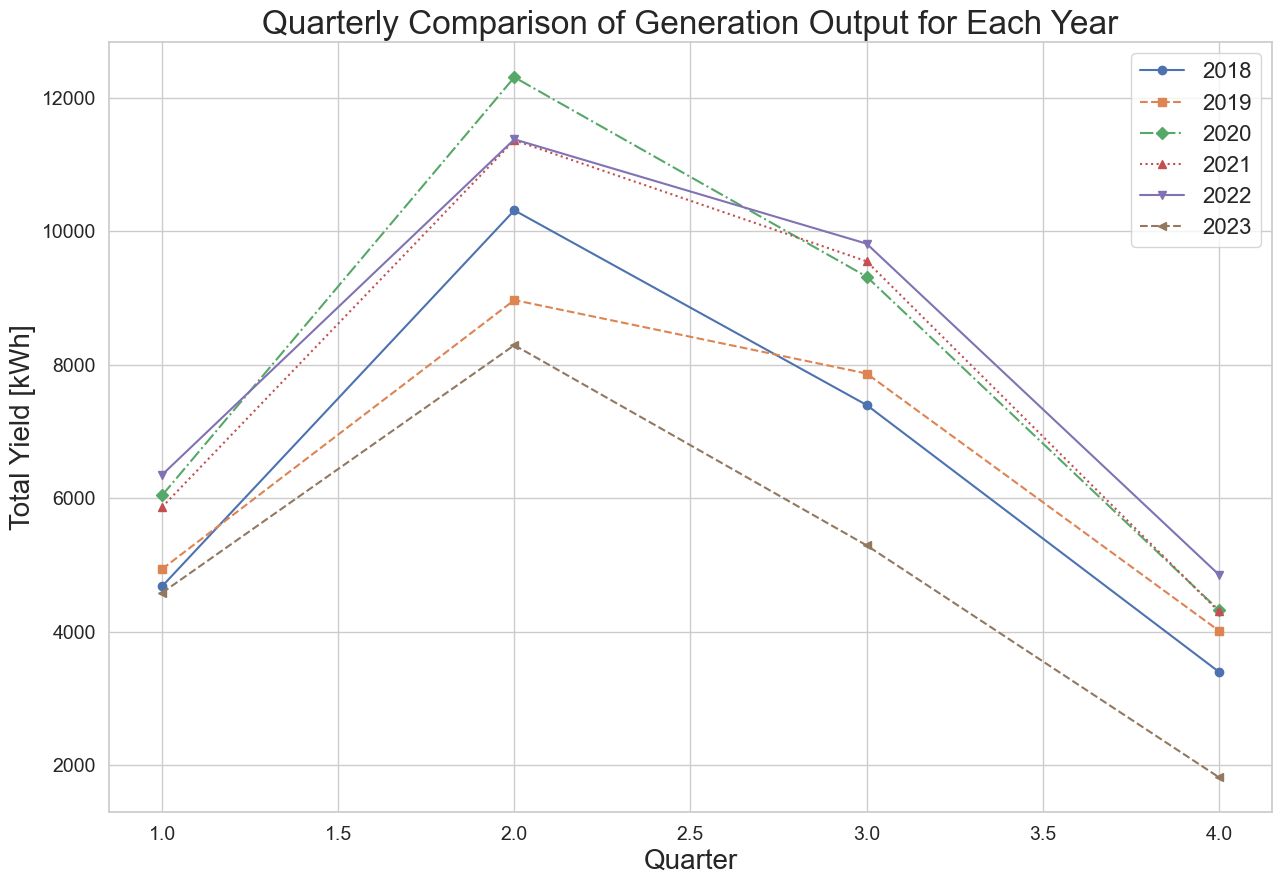

In [40]:
import matplotlib.pyplot as plt

# Step 1: Aggregate data by quarter and year
quarterly_yield = df.resample('Q')['Total Yield[kWh]'].sum()

# Step 2: Extracting the year and quarter for plotting
quarterly_yield.index = quarterly_yield.index.to_period('Q')
quarterly_yield_df = quarterly_yield.reset_index()
quarterly_yield_df['Year'] = quarterly_yield_df['DateTime'].dt.year
quarterly_yield_df['Quarter'] = quarterly_yield_df['DateTime'].dt.quarter

# Define a set of markers and line styles for variation
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'X', 'd', '|', '_']
line_styles = ['-', '--', '-.', ':']

# Step 3: Plotting each year's data with different styles
plt.figure(figsize=(15, 10))
for i, year in enumerate(quarterly_yield_df['Year'].unique()):
    yearly_data = quarterly_yield_df[quarterly_yield_df['Year'] == year]
    plt.plot(yearly_data['Quarter'], yearly_data['Total Yield[kWh]'],
             linestyle=line_styles[i % len(line_styles)],
             marker=markers[i % len(markers)],
             label=year)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.ylabel('Total Yield [kWh]', fontsize=20)
plt.xlabel('Quarter', fontsize=20)
plt.title('Quarterly Comparison of Generation Output for Each Year', fontsize=24)
plt.show()



The observation that the second quarter (which typically encompasses April, May, and June) consistently shows higher solar energy generation across all years can be justified from the angle of seasonality, especially in the context of solar energy production. Let's explore the key factors contributing to this pattern:

    Increased Daylight Hours: The second quarter marks the transition from spring to early summer in the Northern Hemisphere. During this period, the days get progressively longer, resulting in increased daylight hours. More daylight hours directly translate to more sunlight available for solar panels to convert into energy.

    Solar Angle and Intensity: As the sun moves higher in the sky during these months, solar radiation becomes more intense. The angle of the sun’s rays is more direct compared to winter months, leading to more efficient energy generation as solar panels receive more concentrated sunlight.

    Weather Conditions: Typically, the second quarter is characterized by clearer skies and less precipitation compared to other times of the year like late autumn or winter. Clear skies mean fewer obstructions for sunlight, maximizing the potential for solar energy generation.

    Temperature Effects: While extremely high temperatures can reduce the efficiency of solar panels, the moderate temperatures of late spring and early summer are often ideal for solar energy production. It's often in the peak of summer (usually in the third quarter) that extreme heat might start to negatively impact efficiency.

    Historical Patterns and Predictability: The consistent pattern observed over multiple years suggests a strong seasonal trend. In solar energy production, seasonality is a well-known and predictable factor, and the trends observed in your data align with these broader patterns.

In conclusion, the combination of longer days, favorable solar angles, clearer weather conditions, and moderate temperatures during the second quarter are likely contributing to the observed increase in solar energy generation. This seasonal pattern is a key factor in planning and forecasting for solar energy production.

# Scatter plots to visualize outliers in the Entire dataset

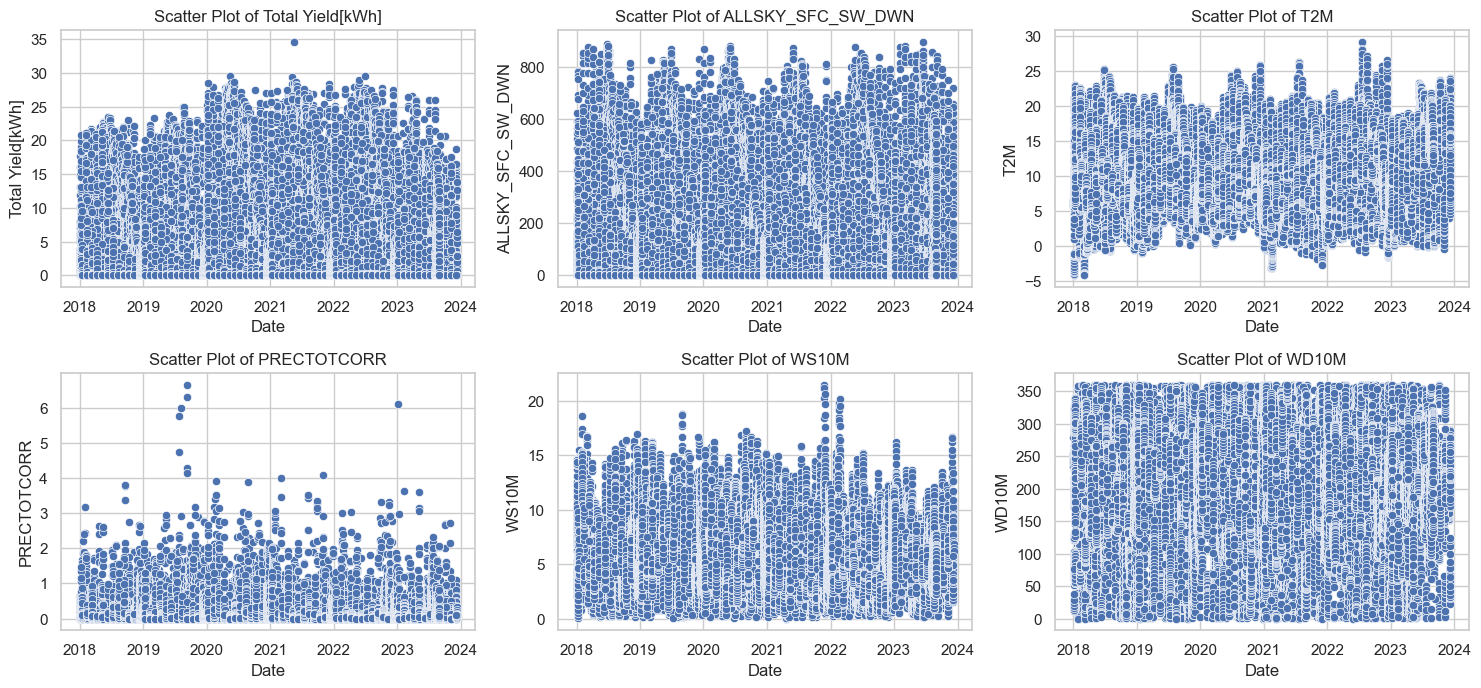

In [41]:
# Using scatter plots to visualize outliers in your dataset
plt.figure(figsize=(15, 10))

# Dropping columns that are not features for the scatter plot
features = df.columns.drop(['Year', 'Month', 'Season'])

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjusting the layout to accommodate all feature plots
    sns.scatterplot(x=df.index, y=df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



Interpreting the Scattered Plot 

Seasonality: Looking for repeating patterns at regular intervals. For example, if a feature shows a consistent rise and fall pattern every year, it might suggest seasonality.

Outliers: Points that are significantly distant from others can be potential outliers. These are data points that are unusually high or low compared to the rest of the data.

Variance: Checking if the spread of the data points changes over time. A widening spread suggests increasing variance, while a narrowing one suggests decreasing variance.

Steps to Remove the Outlier from 2021 Data:

    Identify the Outlier: Determine the outlier in the 'Total Yield[kWh]' data for the year 2021. This can be based on statistical criteria like values exceeding a certain number of standard deviations from the mean.

# Identifying and removing the outlier from the year 2021 in 'Total Yield[kWh]

In [45]:
# Identifying and removing the outlier from the year 2021 in 'Total Yield[kWh]'

# First, let's identify the outlier by looking at the data for 2021
df_2021 = df[df.index.year == 2021]

# Identifying the outlier - assuming it's a significant deviation
outlier_threshold = df_2021['Total Yield[kWh]'].mean() + 3 * df_2021['Total Yield[kWh]'].std()
outlier_index = df_2021[df_2021['Total Yield[kWh]'] > outlier_threshold].index

# Removing the outlier
df_cleaned = df.drop(outlier_index)

# Displaying the first few rows of the cleaned dataset
df_cleaned.head()



,Total Yield[kWh],ALLSKY_SFC_SW_DWN,T2M,PRECTOTCORR,WS10M,WD10M,Year,Month,Season
DateTime,,,,,,,,,
2018-01-01 01:00:00,0.0,0.0,5.76,0.29,9.20,239.93,2018,1,Winter
2018-01-01 02:00:00,0.0,0.0,6.07,0.40,9.98,236.78,2018,1,Winter
2018-01-01 03:00:00,0.0,0.0,6.23,0.28,9.99,237.25,2018,1,Winter
2018-01-01 04:00:00,0.0,0.0,6.12,0.15,9.28,235.04,2018,1,Winter
2018-01-01 05:00:00,0.0,0.0,6.02,0.10,8.72,232.90,2018,1,Winter


# Displaying the first few rows of the cleaned dataset

In [47]:
import pandas as pd

# Assuming df is your DataFrame and it has a DateTime index

# Step 1: Identify the Outlier in 2021
df_2021 = df[df.index.year == 2021]
outlier_threshold = df_2021['Total Yield[kWh]'].mean() + 3 * df_2021['Total Yield[kWh]'].std()
outlier_index = df_2021[df_2021['Total Yield[kWh]'] > outlier_threshold].index

# Step 2: Remove the Outlier
df_cleaned = df.drop(outlier_index)

# Displaying the first few rows of the cleaned dataset
print(df_cleaned.head())


                     Total Yield[kWh]  ALLSKY_SFC_SW_DWN   T2M  PRECTOTCORR  \
DateTime                                                                      
2018-01-01 01:00:00               0.0                0.0  5.76         0.29   
2018-01-01 02:00:00               0.0                0.0  6.07         0.40   
2018-01-01 03:00:00               0.0                0.0  6.23         0.28   
2018-01-01 04:00:00               0.0                0.0  6.12         0.15   
2018-01-01 05:00:00               0.0                0.0  6.02         0.10   

                     WS10M   WD10M  Year  Month  Season  
DateTime                                                 
2018-01-01 01:00:00   9.20  239.93  2018      1  Winter  
2018-01-01 02:00:00   9.98  236.78  2018      1  Winter  
2018-01-01 03:00:00   9.99  237.25  2018      1  Winter  
2018-01-01 04:00:00   9.28  235.04  2018      1  Winter  
2018-01-01 05:00:00   8.72  232.90  2018      1  Winter  


# Creating the Scatter Plot to Re-Visualize if the Outlier has been Eliminated in 2021 

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Filtering the data for the year 2021
df_2021 = df[df.index.year == 2021]

# Creating the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_2021.index, y=df_2021['Total Yield[kWh]'])
plt.title('Scatter Plot of Total Yield[kWh] in 2021')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


In [49]:
import pandas as pd

# Assuming df is your DataFrame

# Identifying the indices where 'Total Yield[kWh]' exceeds 30 kWh
outlier_indices = df[df['Total Yield[kWh]'] > 30].index

# Removing these outliers from the dataset
df_cleaned = df.drop(outlier_indices)

# Displaying the first few rows of the cleaned dataset
print(df_cleaned.head())


                     Total Yield[kWh]  ALLSKY_SFC_SW_DWN   T2M  PRECTOTCORR  \
DateTime                                                                      
2018-01-01 01:00:00               0.0                0.0  5.76         0.29   
2018-01-01 02:00:00               0.0                0.0  6.07         0.40   
2018-01-01 03:00:00               0.0                0.0  6.23         0.28   
2018-01-01 04:00:00               0.0                0.0  6.12         0.15   
2018-01-01 05:00:00               0.0                0.0  6.02         0.10   

                     WS10M   WD10M  Year  Month  Season  
DateTime                                                 
2018-01-01 01:00:00   9.20  239.93  2018      1  Winter  
2018-01-01 02:00:00   9.98  236.78  2018      1  Winter  
2018-01-01 03:00:00   9.99  237.25  2018      1  Winter  
2018-01-01 04:00:00   9.28  235.04  2018      1  Winter  
2018-01-01 05:00:00   8.72  232.90  2018      1  Winter  


remove all rows from your DataFrame where the 'Total Yield[kWh]' exceeds 30 kWh. The resulting df_cleaned DataFrame will no longer contain these outliers.

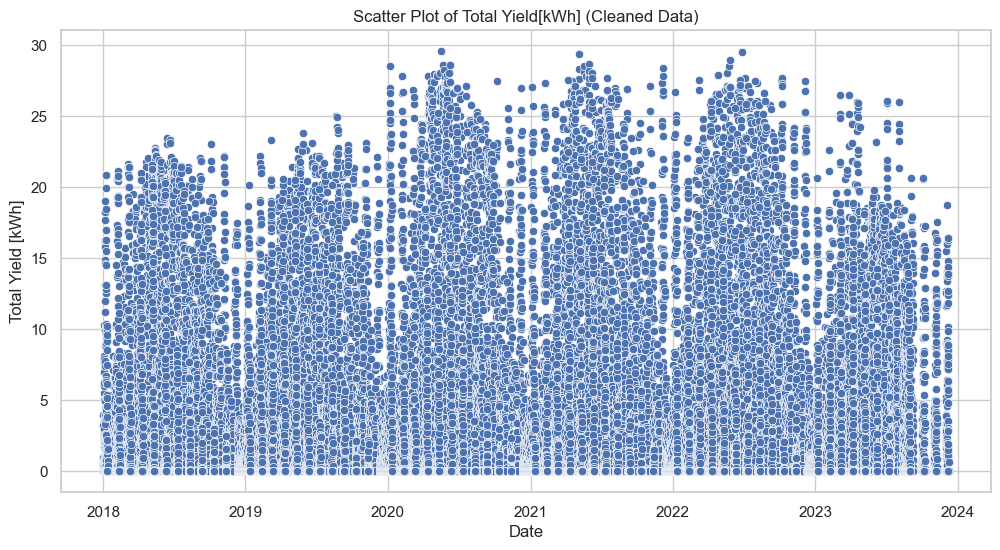

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your DataFrame after removing outliers

# Creating the scatter plot for the cleaned data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned.index, y=df_cleaned['Total Yield[kWh]'])
plt.title('Scatter Plot of Total Yield[kWh] (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


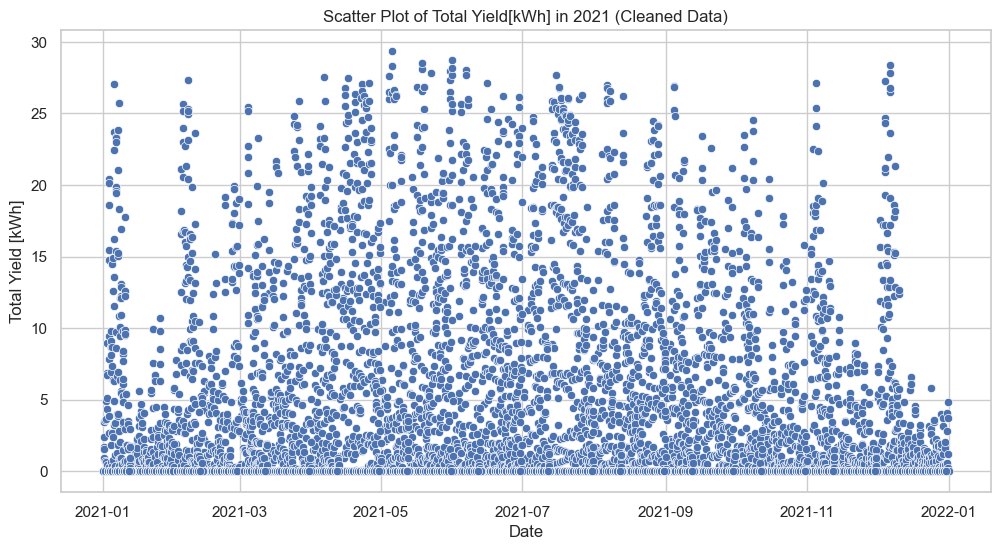

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your DataFrame after removing outliers

# Filtering the data for the year 2021
df_cleaned_2021 = df_cleaned[df_cleaned.index.year == 2021]

# Creating the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_cleaned_2021.index, y=df_cleaned_2021['Total Yield[kWh]'])
plt.title('Scatter Plot of Total Yield[kWh] in 2021 (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Total Yield [kWh]')
plt.show()


scatter plot specifically for the year 2021, allowing you to visually inspect the 'Total Yield[kWh]' data after removing the identified outliers.

# Identifying and removing the outlier from the year 2021 in Precipitation

Although, the precipitation column did not correlate well with the target variable (the total yield of the PV system) according to the previous analysis carried out, we can still remove the outliers in their data set: 

In [83]:
# Assuming 'df' is your DataFrame

# Dropping rows where 'PRECTOTCORR' values are above 2
df_filtered = df[df['PRECTOTCORR'] <= 2]

# Displaying the first few rows of the filtered dataset
print(df_filtered.head())


                     Total Yield[kWh]  ALLSKY_SFC_SW_DWN   T2M  PRECTOTCORR  \
DateTime                                                                      
2018-01-01 01:00:00               0.0                0.0  5.76         0.29   
2018-01-01 02:00:00               0.0                0.0  6.07         0.40   
2018-01-01 03:00:00               0.0                0.0  6.23         0.28   
2018-01-01 04:00:00               0.0                0.0  6.12         0.15   
2018-01-01 05:00:00               0.0                0.0  6.02         0.10   

                     WS10M   WD10M  Year  Month  Season  
DateTime                                                 
2018-01-01 01:00:00   9.20  239.93  2018      1  Winter  
2018-01-01 02:00:00   9.98  236.78  2018      1  Winter  
2018-01-01 03:00:00   9.99  237.25  2018      1  Winter  
2018-01-01 04:00:00   9.28  235.04  2018      1  Winter  
2018-01-01 05:00:00   8.72  232.90  2018      1  Winter  


# The Scatter Plot for Precipitation to check if Outliers are out 

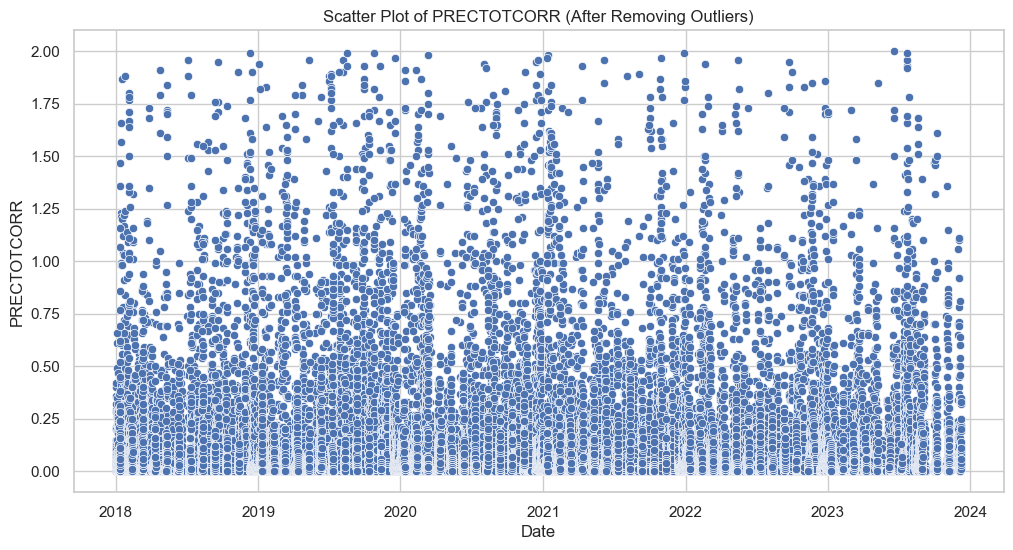

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_filtered' is your DataFrame after removing outliers from 'PRECTOTCORR'

# Creating the scatter plot for 'PRECTOTCORR'
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_filtered.index, y=df_filtered['PRECTOTCORR'])
plt.title('Scatter Plot of PRECTOTCORR (After Removing Outliers)')
plt.xlabel('Date')
plt.ylabel('PRECTOTCORR')
plt.show()



# FEATURES IMPORTANCE TEST FOR UNIVARIATE AND MULTIVARIATE MODELING ANALYSIS 

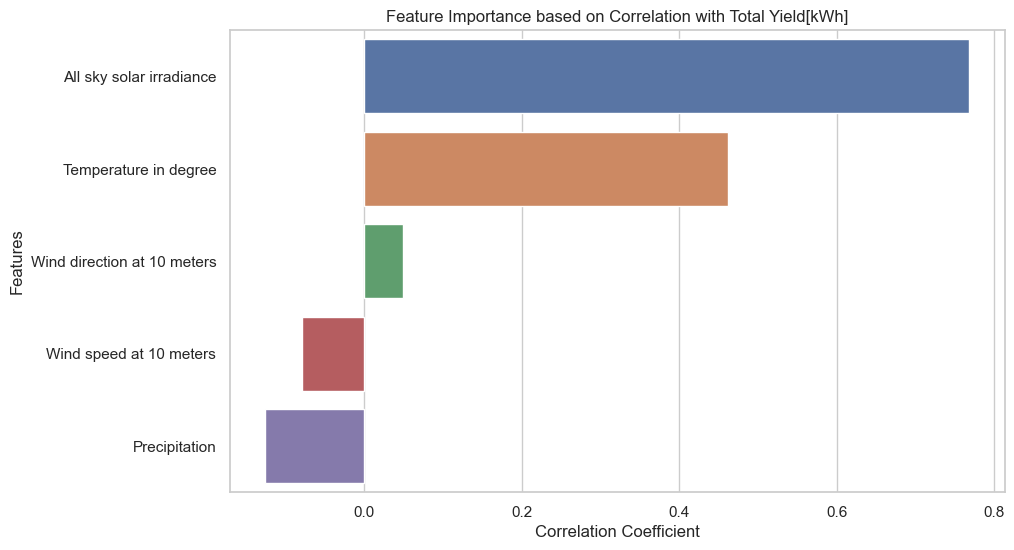

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming historical_data is your updated DataFrame with renamed features

# Drop 'Year' and 'Month' columns if they are present in historical_data
if 'Year' in historical_data.columns and 'Month' in historical_data.columns:
    historical_data = historical_data.drop(['Year', 'Month'], axis=1)

# Calculate correlation coefficients with the target variable, specifying numeric_only
correlation_with_target = historical_data.corr(numeric_only=True)['Total Yield[kWh]'].sort_values(ascending=False)

# Remove the correlation of the target variable with itself
correlation_with_target.drop('Total Yield[kWh]', inplace=True)

# Visualize the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Feature Importance based on Correlation with Total Yield[kWh]')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


The correlation analysis of the features in relation to the 'Total Yield[kWh]' reveals a significant insight: only the first two features exhibit a positive correlation with the target variable. This finding suggests that these two features have a linear relationship with the total yield, where increases in their values are associated with increases in 'Total Yield[kWh]'.

In summary, the positive correlation of the first two features with 'Total Yield[kWh]' highlights their potential importance and warrants further investigation, especially in the context of predictive modeling and feature selection. This analysis forms a solid foundation for the next steps in the data science workflow, particularly in the realms of feature engineering and model development.

# UNIVARIATE DATA SET FOR MODELLING AND FORECASTING PV FUTURE GENERATION

In [108]:
# Creating the Univariate_Analysis DataFrame
Univariate_Analysis = df[['Total Yield[kWh]']].copy()
Univariate_Analysis.index = df.index  # Using the DataFrame's index

# Creating the Multivariate_Analysis DataFrame
# This includes 'ALLSKY_SFC_SW_DWN', 'T2M', 'WD10M', and 'Total Yield[kWh]'
Multivariate_Analysis = df[['ALLSKY_SFC_SW_DWN', 'T2M', 'WD10M', 'Total Yield[kWh]']].copy()
Multivariate_Analysis.index = df.index  # Using the same index as df


The Univariate Dataframe contains only the Total Yeild of the PV from 2019 - 2023 without any weather data

The Multivariate Dataframe contains the Total yeild of the PV from 2019 - 2023 and the correlating Weather Data of the All Sky Solar Irradiance, Temprature and Wind direction

# CONCLUSION


The comprehensive Exploratory Data Analysis (EDA) conducted on the Durning Centre's PV system dataset indicates a high potential for its application in machine learning and deep learning models. Some observations from the EDA process are:



•	The Durning Centre PV system installation size of 39.02 kWh is 10.98 kWh short of the United Kingdom government's minimum approved generation requirement to sell the DC generation output of largely domestic-scale installations of a renewable energy system to the National Grid (Beis et al., 2019). Nonetheless, the output generation is substantial enough for a preliminary forecasting analysis that can guide the behavioural analysis of the future generation output of small or large-scale PV grids.



•	The year-over-year change [kWh] in generation output of the PV system shows that there was a year-end increment in generation output in three (3) out of the five (5) years from 2018 to 2023 considered in the analysis. 2023 had a huge dip in generation, and the pro-rata analysis conducted for that particular year could not make up for the shortfall in generation. This is a point of concern that can significantly affect the impending forecasting analysis.



•	The correlation analysis and feature importance test carried out show that weather features such as temperature, solar irradiance, and wind speed are positively correlated with the target (total yield of the PV system) that we intend to predict. Wind direction and precipitation weather features are negatively correlated with the target variable, making them unsuitable for inclusion as features to avoid affecting the overall accuracy of our prediction.



•	The Augmented Dickey Fuller Test showed that statistical properties like mean, and variance are consistent over time, making the dataset suitable for many types of time series forecasting models that assume stationarity.
•	The seasonality analysis conducted showed that 2021 had the peak generation output of all the years considered, which occurred in the summer. The summer peak generation is relative for the years considered.



In conclusion, the careful preprocessing, along with detailed statistical and visual analyses, has ensured that the dataset is robust, reliable, and primed for predictive modeling. This groundwork paves the way for developing advanced models that can accurately forecast the future energy generation of the PV system. Such forecasts are instrumental in achieving smarter grid integration, optimizing renewable energy use, and prioritizing maintenance and operational decisions, thereby contributing significantly to the efficiency and sustainability of power systems.



# REFERENCES 
• Beis.R., Woodman, B., & Connor, P. (2019). Policy and regulatory barriers to local energy 
markets in Great Britain. EPG working paper: epg 1801. University of Exeter Energy Policy 
Group.


• NASA Prediction of Worldwide Energy Resources. Worldwide Energy Resources 
(POWER) https://power.larc.nasa.gov/data-access-viewer/ for Edge Hill University, 
Ormskirk on Latitude 53.558622, Longitude -2.875178.